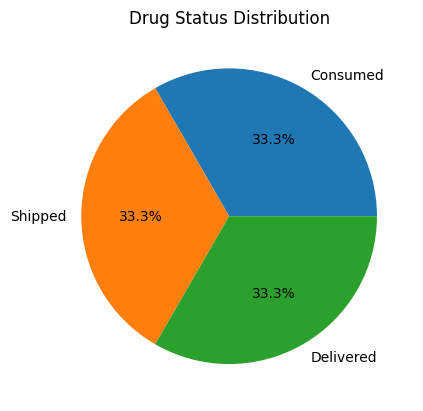

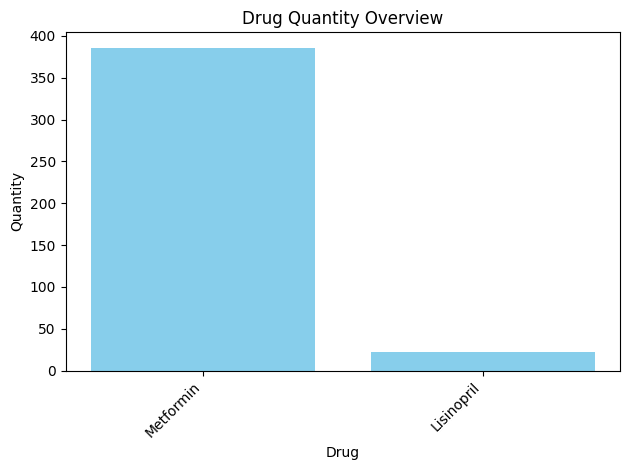

In [ ]:
import tkinter as tk
from tkinter import ttk, messagebox
import csv
import matplotlib.pyplot as plt

# ------------------- Utils -------------------
def load_inventory():
    try:
        with open("inventory.csv", newline='') as f:
            return list(csv.DictReader(f))
    except FileNotFoundError:
        return []

def save_inventory(data):
    with open("inventory.csv", 'w', newline='') as f:
        writer = csv.DictWriter(f, fieldnames=["name", "batch", "quantity", "status", "location"])
        writer.writeheader()
        writer.writerows(data)

def load_vendors():
    try:
        with open("vendors.csv", newline='') as f:
            return list(csv.DictReader(f))
    except FileNotFoundError:
        return []

def save_vendors(data):
    with open("vendors.csv", 'w', newline='') as f:
        writer = csv.DictWriter(f, fieldnames=["vendor", "drug", "shipment_date", "status"])
        writer.writeheader()
        writer.writerows(data)

# ------------------- Login System -------------------
def login():
    user = username.get().strip()
    pwd = password.get().strip()

    try:
        with open("users_30_entries.csv", newline='') as f:
            reader = csv.DictReader(f)
            for row in reader:
                if row['username'].strip() == user and row['password'].strip() == pwd:
                    login_win.destroy()
                    main_menu(row['role'])
                    return
        messagebox.showerror("Login Failed", "Invalid credentials")
    except FileNotFoundError:
        messagebox.showerror("Error", "users_30_entries.csv not found.")

# ------------------- Main App -------------------
def main_menu(role):
    root = tk.Tk()
    root.title(f"Drug Tracker - Logged in as {role}")

    def open_inventory():
        win = tk.Toplevel(root)
        win.title("Inventory Tracker")

        tree = ttk.Treeview(win, columns=("Name", "Batch", "Qty", "Status", "Location"), show='headings')
        for col in tree["columns"]:
            tree.heading(col, text=col)
        tree.pack()

        def refresh():
            tree.delete(*tree.get_children())
            for item in load_inventory():
                tags = ('low',) if int(item['quantity']) < 100 else ()
                tree.insert('', 'end', values=(item["name"], item["batch"], item["quantity"], item["status"], item["location"]), tags=tags)

        def add_drug():
            def save():
                new = {
                    "name": e1.get(),
                    "batch": e2.get(),
                    "quantity": e3.get(),
                    "status": e4.get(),
                    "location": e5.get()
                }
                data = load_inventory()
                data.append(new)
                save_inventory(data)
                refresh()
                top.destroy()

            top = tk.Toplevel(win)
            tk.Label(top, text="Name").grid(row=0, column=0)
            e1 = tk.Entry(top); e1.grid(row=0, column=1)
            tk.Label(top, text="Batch").grid(row=1, column=0)
            e2 = tk.Entry(top); e2.grid(row=1, column=1)
            tk.Label(top, text="Qty").grid(row=2, column=0)
            e3 = tk.Entry(top); e3.grid(row=2, column=1)
            tk.Label(top, text="Status").grid(row=3, column=0)
            e4 = tk.Entry(top); e4.grid(row=3, column=1)
            tk.Label(top, text="Location").grid(row=4, column=0)
            e5 = tk.Entry(top); e5.grid(row=4, column=1)
            tk.Button(top, text="Save", command=save).grid(row=5, columnspan=2)

        tree.tag_configure('low', foreground='red')
        tk.Button(win, text="Add Drug", command=add_drug).pack()
        tk.Button(win, text="Refresh", command=refresh).pack()
        refresh()

    def open_vendors():
        win = tk.Toplevel(root)
        win.title("Vendor Tracker")

        tree = ttk.Treeview(win, columns=("Vendor", "Drug", "Shipment Date", "Status"), show='headings')
        for col in tree["columns"]:
            tree.heading(col, text=col)
        tree.pack()

        def refresh():
            tree.delete(*tree.get_children())
            for v in load_vendors():
                tree.insert('', 'end', values=(v['vendor'], v['drug'], v['shipment_date'], v['status']))

        def add_vendor():
            def save():
                new = {
                    "vendor": e1.get(),
                    "drug": e2.get(),
                    "shipment_date": e3.get(),
                    "status": e4.get()
                }
                data = load_vendors()
                data.append(new)
                save_vendors(data)
                refresh()
                top.destroy()

            top = tk.Toplevel(win)
            tk.Label(top, text="Vendor").grid(row=0, column=0)
            e1 = tk.Entry(top); e1.grid(row=0, column=1)
            tk.Label(top, text="Drug").grid(row=1, column=0)
            e2 = tk.Entry(top); e2.grid(row=1, column=1)
            tk.Label(top, text="Shipment Date").grid(row=2, column=0)
            e3 = tk.Entry(top); e3.grid(row=2, column=1)
            tk.Label(top, text="Status").grid(row=3, column=0)
            e4 = tk.Entry(top); e4.grid(row=3, column=1)
            tk.Button(top, text="Save", command=save).grid(row=4, columnspan=2)

        tk.Button(win, text="Add Vendor", command=add_vendor).pack()
        tk.Button(win, text="Refresh", command=refresh).pack()
        refresh()

    def open_dashboard():
        win = tk.Toplevel(root)
        win.title("Dashboard")

        data = load_inventory()
        if not data:
            tk.Label(win, text="No inventory data available.").pack()
            return

        total_drugs = sum(int(d['quantity']) for d in data)
        low_stock = len([d for d in data if int(d['quantity']) < 100])

        tk.Label(win, text=f"Total Drugs in Stock: {total_drugs}").pack()
        tk.Label(win, text=f"Low Stock Alerts: {low_stock}").pack()

        statuses = {}
        for d in data:
            s = d['status']
            statuses[s] = statuses.get(s, 0) + 1

        def plot_pie():
            if statuses:
                plt.figure()
                plt.pie(statuses.values(), labels=statuses.keys(), autopct='%1.1f%%')
                plt.title("Drug Status Distribution")
                plt.show()

        def plot_bar():
            if data:
                drugs = [d['name'] for d in data]
                qtys = [int(d['quantity']) for d in data]
                plt.figure()
                plt.bar(drugs, qtys, color='skyblue')
                plt.title("Drug Quantity Overview")
                plt.xlabel("Drug")
                plt.ylabel("Quantity")
                plt.xticks(rotation=45, ha='right')
                plt.tight_layout()
                plt.show()

        tk.Button(win, text="Show Pie Chart", command=plot_pie).pack()
        tk.Button(win, text="Show Bar Chart", command=plot_bar).pack()

    tk.Button(root, text="Inventory", command=open_inventory, width=20).pack(pady=10)
    tk.Button(root, text="Vendors", command=open_vendors, width=20).pack(pady=10)
    tk.Button(root, text="Dashboard", command=open_dashboard, width=20).pack(pady=10)
    tk.Button(root, text="Exit", command=root.destroy, width=20).pack(pady=10)

    root.mainloop()

# ------------------- Login UI -------------------
login_win = tk.Tk()
login_win.title("Login System")

tk.Label(login_win, text="Username").pack()
username = tk.Entry(login_win)
username.pack()

tk.Label(login_win, text="Password").pack()
password = tk.Entry(login_win, show="*")
password.pack()

tk.Button(login_win, text="Login", command=login).pack()
login_win.mainloop()